In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import metrics  
from sklearn.cluster import KMeans

In [42]:
directory = r'C:\Users\piran\Downloads\Sparks Intern\Untitled Folder\Iris.csv'
data1 = pd.read_csv(directory)

In [46]:
data1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [47]:
data = data1.iloc[:,1:5].values

In [48]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

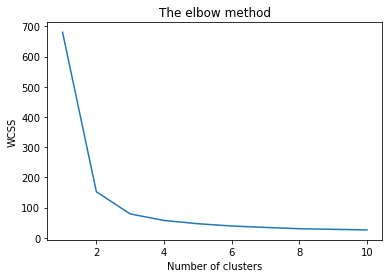

In [52]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [127]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data)
data1[y_kmeans == 2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
...,...,...,...,...,...,...
133,134,6.3,2.8,5.1,1.5,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica


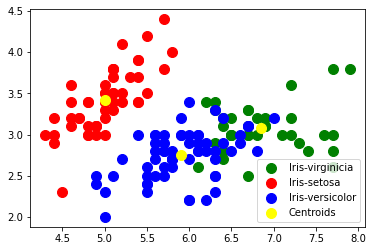

In [128]:

plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-virginicia')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-versicolor')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

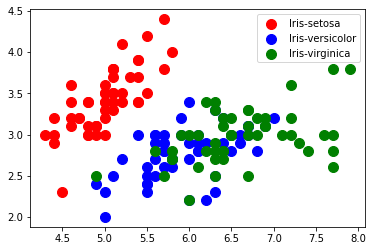

In [129]:
plt.scatter(data1[data1.Species=="Iris-setosa"].SepalLengthCm, data1[data1.Species=="Iris-setosa"].SepalWidthCm, 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data1[data1.Species=="Iris-versicolor"].SepalLengthCm, data1[data1.Species=="Iris-versicolor"].SepalWidthCm, 
            s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(data1[data1.Species=='Iris-virginica'].SepalLengthCm, data1[data1.Species=='Iris-virginica'].SepalWidthCm,
            s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()